#### Import Libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as pex
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

#### Load Data

In [5]:
# data = pd.read_csv(f'..\data\StudentsPerformance.csv')

# df_extra = []
# for i in range(8):
#     df = pd.read_csv(f'..\data\exams ({i+1}).csv')
#     df_extra.append(df)
    
# data_total = pd.concat([data, pd.concat(df_extra)], axis=0)

# data = data_total.copy()
# display(data.info())
 
# display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       9000 non-null   object
 1   race/ethnicity               9000 non-null   object
 2   parental level of education  9000 non-null   object
 3   lunch                        9000 non-null   object
 4   test preparation course      9000 non-null   object
 5   math score                   9000 non-null   int64 
 6   reading score                9000 non-null   int64 
 7   writing score                9000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 632.8+ KB


None

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# data.to_csv(f'..\data\Performance_data.csv', index=False)

In [4]:
data = pd.read_csv(f'..\data\Performance_data.csv')

In [8]:
print('There are a total {} missing values in the dataset'.format(data.isnull().any().sum()))

There are a total 0 missing values in the dataset


In [9]:
print('There are {} duplicated rows in the dataset.'.format(data.duplicated().sum()))
data.drop_duplicates(inplace=True)
print('Number of rows after dropping duplicates is {}.'.format(data.shape[0]))

There are 34 duplicated rows in the dataset.
Number of rows after dropping duplicates is 8966.


In [10]:
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score'])/3

#### Outlier Analysis

In [37]:
upper_limit_math = data['math score'].mean() + 3*data['math score'].std()
lower_limit_math = data['math score'].mean() - 3*data['math score'].std()
upper_limit_reading = data['reading score'].mean() + 3*data['reading score'].std()
lower_limit_reading = data['reading score'].mean() - 3*data['reading score'].std()
upper_limit_writing = data['writing score'].mean() + 3*data['writing score'].std()
lower_limit_writing = data['writing score'].mean() - 3*data['writing score'].std()

print('The boundaries for the outliers are as follows:\n')
print("Upper boundary math_score: ",np.round(upper_limit_math, 2))
print("Lower boundary math_score: ",np.round(lower_limit_math, 2))
print('\n')
print("Upper boundary reading_score: ",np.round(upper_limit_reading, 2))
print("Lower boundary reading_score: ",np.round(lower_limit_reading, 2))
print('\n')
print("Upper boundary writing_score: ",np.round(upper_limit_writing, 2))
print("Lower boundary writing_score: ",np.round(lower_limit_writing, 2))

The boundaries for the outliers are as follows:

Upper boundary math_score:  111.73
Lower boundary math_score:  21.67


Upper boundary reading_score:  113.08
Lower boundary reading_score:  26.25


Upper boundary writing_score:  113.84
Lower boundary writing_score:  22.97


In [7]:
#plot boxplot for three scores for male and female

male_scores = data[data['gender'] == 'male']
female_scores = data[data['gender'] == 'female']

fig = make_subplots(rows=1, cols=3, subplot_titles=("Math Score", "Reading Score", "Writing Score"))

fig.add_trace(go.Box(y=male_scores['math score'], name='Male', boxpoints='all', marker_color='skyblue'), row=1, col=1)
fig.add_trace(go.Box(y=male_scores['reading score'], name='Male', boxpoints='all', marker_color='skyblue'), row=1, col=2)
fig.add_trace(go.Box(y=male_scores['writing score'], name='Male', boxpoints='all', marker_color='skyblue'), row=1, col=3)

fig.add_trace(go.Box(y=female_scores['math score'], name='Female', boxpoints='all', marker_color='pink'), row=1, col=1)
fig.add_trace(go.Box(y=female_scores['reading score'], name='Female', boxpoints='all', marker_color='pink'), row=1, col=2)
fig.add_trace(go.Box(y=female_scores['writing score'], name='Female', boxpoints='all', marker_color='pink'), row=1, col=3)

# Update the layout
fig.update_layout(title="Scores by Gender", showlegend=False)

# Show the plot
fig.show()


#### Data Visualization

##### We can further divide the independent parameters into two groups - **inherent attributes** (those we do not have control over) such as gender, race or ethnicity and parental education level; and **acquired attributes** (those we can have control over) such as the test preparation course and lunch type. 

In [14]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'black', 'Gray']

fig = make_subplots(rows=3, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}], 
                           [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(
        labels=data['gender'],
        values=None,
        hole=.4,
        title='Gender',
        titlefont={'color':'black', 'size': 24},
        ),
    row=1,col=1
    )


fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=colors, 
        line=dict(color='#000000',
                  width=2)
        )
    )

fig.add_trace(
    go.Pie(
        labels=data['race/ethnicity'],
        values=None,
        hole=.4,
        title='Race',
        titlefont={'color':'black', 'size': 24},
        ),
    row=1,col=2
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=colors,
        line=dict(color='#000000',
                  width=2)
        )
    )

fig.add_trace(
    go.Pie(
        labels=data['parental level of education'],
        values=None,
        hole=.4,
        title='ParentEduc.',
        titlefont={'color':'black', 'size': 24},
        ),
    row=2,col=1
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=colors,
        line=dict(color='#000000',
                  width=2)
        )
    )

fig.add_trace(
    go.Pie(
        labels=data['lunch'],
        values=None,
        hole=.4,
        title='Lunch',
        titlefont={'color':'black', 'size': 24},
        ),
    row=2,col=2
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=colors,
        line=dict(color='#000000',
                  width=2)
        )
    )

fig.add_trace(
    go.Pie(
        labels=data['test preparation course'],
        values=None,
        hole=.4,
        title='TestPrep.',
        titlefont={'color':'black', 'size': 24},
       ),
    row=3,col=1
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=colors,
        line=dict(color='#000000',
                  width=2)
        )
    )
fig.layout.update(title="Independent Features Distribution", showlegend=False, height=850, width=750, 
                  template=None, titlefont={'color':'black', 'size': 24}
                 )
fig.show()


##### Are catergories withing a feature fairly balanced?

* Gender: Gender is fairly balanced - with 51% feamles to 49% males.
* Race/ethnicity: Here group C is the most represented with 31.8%, group A is the least with 8.2%.
* Parental education level: Master's degree holder parents are the fewest represented followed by parents with bachelor's degree. The rest are in the same ball-park
* Lunch type: 65% of the students have standard lunch the rest is free/reduced lunch.
* Test preparation course: 65.6% of the students haven't had test preparation course

In [16]:
df = data
fig = px.histogram(df, 
                   x="parental level of education", 
                   y=None, color="gender", width=600, height=400,
                   barmode= 'group',
                   histnorm='percent',
                   category_orders={
                       "parental level of education": ["some high school", "high school", "associate's degree", "some college", "bachelor's degree", "master's degree"],
                       "gender": ["male", "female"]
                },
                
                color_discrete_map={ 
                    "male": "lightblue", "female": "lightsalmon"
                },
                template="simple_white"
                )

fig.update_layout(title="<b> Parental Level of Education", 
                  font_family="San Serif",
                  titlefont={'size': 24},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 )
fig.show()

##### race #####

fig = px.histogram(df, x="race/ethnicity", y=None, color="gender",
                width=600, height=400, barmode='group',
                histnorm='percent',
                category_orders={ 
                "race/ethnicity": ["group A", "group B", "group C", "group D", "group E"], 
                "gender": ["male", "female"]
                },
                color_discrete_map={ 
                    "male": "lightblue", "female": "lightsalmon"
                },
                template="simple_white"
                )

fig.update_layout(title="<b> Race/Ethnic Group", 
                  font_family="San Serif",
                  titlefont={'size': 24},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 )

fig.show()

##### lunch #####

fig = px.histogram(df, x="lunch", y=None, color="gender",
                width=600, height=400, barmode='group',
                histnorm='percent',
                color_discrete_map={ 
                    "male": "lightblue", "female": "lightsalmon"
                },
                template="simple_white"
                )

fig.update_layout(title="<b> Lunch Type",
                  font_family="San Serif",
                  titlefont={'size': 24},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 )
fig.show()


#### test prep ####
fig = px.histogram(df, x="test preparation course", y=None, color="gender",
                width=600, height=400, barmode='group',
                histnorm='percent',
                color_discrete_map={ 
                    "male": "lightblue", "female": "lightsalmon"
                },
                template="simple_white"
                )

fig.update_layout(title="<b> Test Preparation Course",
                  font_family="San Serif",
                  titlefont={'size': 24},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 )
fig.show()


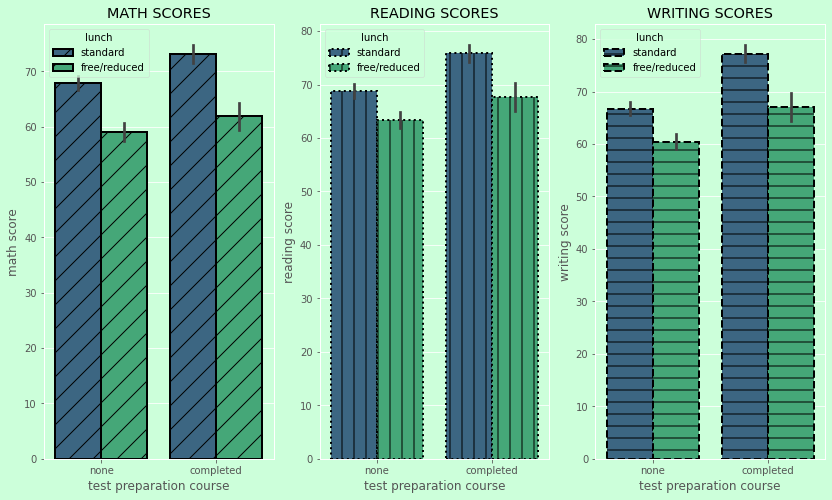

In [15]:
plt.rcParams['axes.facecolor'] = "#ccffda"
plt.rcParams['figure.facecolor'] = "#ccffda"

plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='lunch',palette='viridis',edgecolor='black',**{'hatch':'/','linewidth':2})
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='lunch',palette='viridis',edgecolor='black',**{'hatch':"|",'linewidth':2,'linestyle':':'})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch',palette='viridis',edgecolor='black',**{'hatch':'-','linewidth':2,'linestyle':'--'})
plt.title('WRITING SCORES')
plt.show()

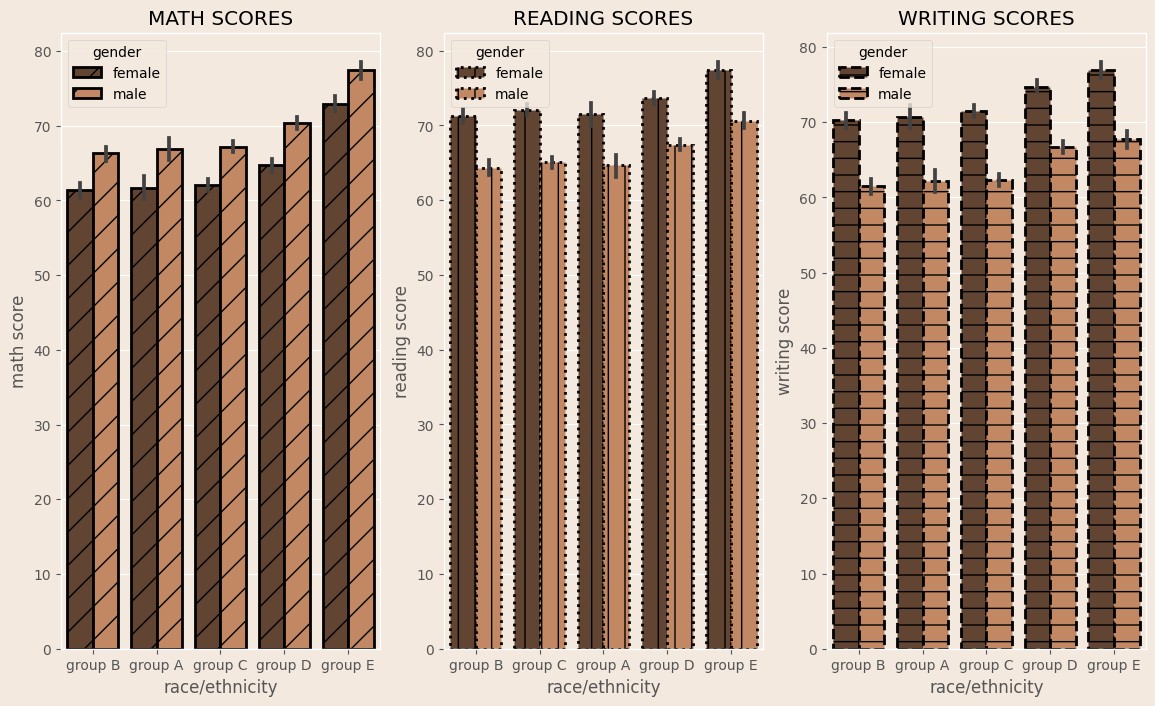

In [14]:
df = data
plt.rcParams['axes.facecolor'] = "#F3E9DF"
plt.rcParams['figure.facecolor'] = "#F3E9DF"

order = df.groupby('race/ethnicity')['math score'].mean().sort_values().index
order_1 = df.groupby('race/ethnicity')['writing score'].mean().sort_values().index


plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='copper',edgecolor='black',**{'hatch':'/','linewidth':2},order=order)
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='copper',edgecolor='black',**{'hatch':"|",'linewidth':2,'linestyle':':'})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='copper',edgecolor='black',**{'hatch':'-','linewidth':2,'linestyle':'--'},order=order_1)
plt.title('WRITING SCORES')
plt.show()

##### In all the cases the scores are higher by having the standard lunch.

In [18]:
df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']>90)]\
.sort_values(by=['average_score'],ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
8995,female,group D,associate's degree,standard,completed,100,100,100,100.000000
1034,male,group E,associate's degree,standard,completed,100,100,100,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,100.000000
1441,male,group D,master's degree,standard,completed,100,100,100,100.000000
2267,female,group D,master's degree,standard,completed,100,100,100,100.000000
...,...,...,...,...,...,...,...,...,...
3067,male,group D,some high school,standard,completed,93,92,91,92.000000
8422,female,group D,high school,standard,completed,92,93,91,92.000000
3318,male,group B,bachelor's degree,standard,none,93,92,91,92.000000
2076,male,group E,some college,standard,completed,91,91,93,91.666667


##### The first two toppers are either geniuses or they did some malpractice as their test preparation course was none.

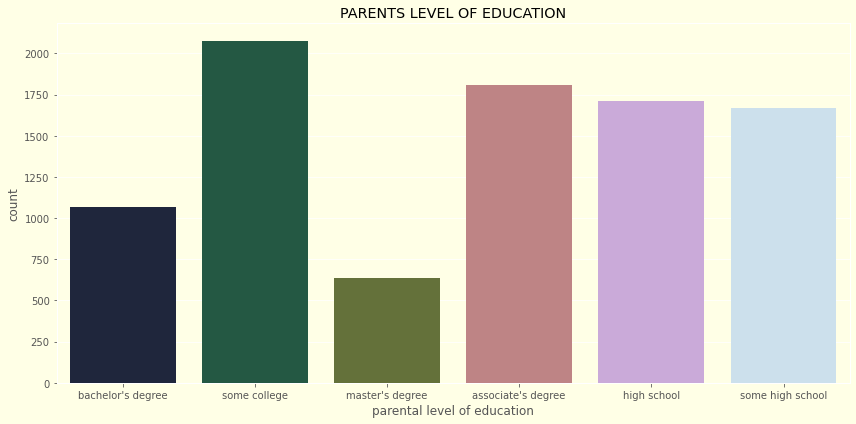

In [23]:
plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION')
sns.countplot(x='parental level of education',data=df,palette='cubehelix')
plt.tight_layout()

##### The above plot shows most of the parents went to some college or had associate's degree and there are very less people who had higher studies.

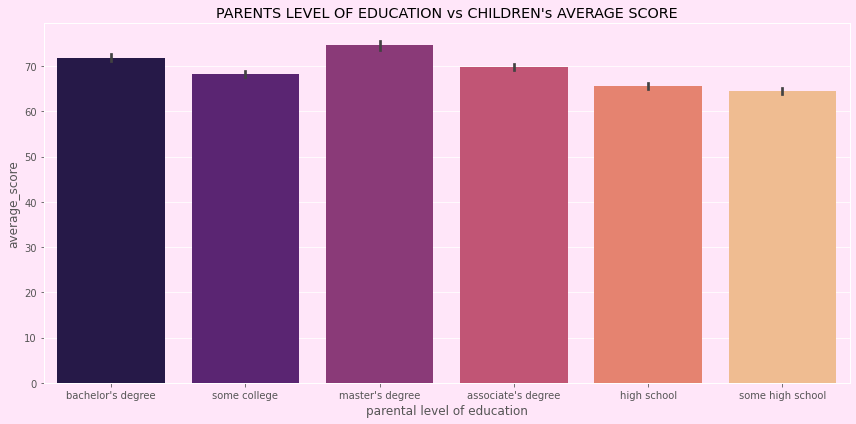

In [19]:
plt.rcParams['figure.facecolor'] = "#ffe6f9"
plt.rcParams['axes.facecolor'] = "#ffe6f9"
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION vs CHILDREN\'s AVERAGE SCORE')
sns.barplot(x=df['parental level of education'],y='average_score',data=df,palette='magma')
plt.tight_layout()

##### From the above plot its clear that if the parental education is better their children tend to score better in all areas (math, reading, writing).

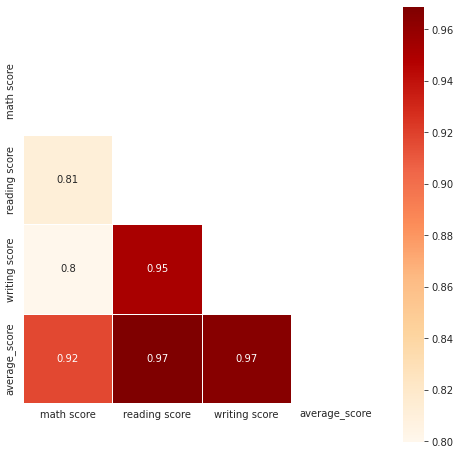

In [32]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="OrRd",annot=True)

##### Points noted from above heatmap:

* High correlations between total_scores and individual_scores
* Writing_score and reading_score are also highly correlated which tells us that if a student reads well then he/she also writes well.
* Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa

#### Inference on EDA

* Both groups of students have their strengths and weaknesses in test performances. Male students were better in maths and females in the other two test subjects.
* Tutorials/test preparation courses helped improve their score. It helped male students in their writing test especially those from race group B and C whose parents have 'some college' education.
* Lunch type also had an effect on students' test performance. A reduced or free lunch had an influence (negative) on the math score of race group A and C female students.
* Race and parental education level also seem to have an effect on the students test score. Generally race group E were the better performers while race group A being the low achievers. Students whose parents have a high level education scored the better scores, generally.
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.

##### Grade Analysis

In [36]:
df["Grade"] = "F" 
df["Result"] = "Fail"
# Set the passmark for each subject
math_passmark = 30
reading_passmark = 40
writing_passmark = 35

# Calculate the average score
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Assign grades based on average score ranges
df.loc[df['average_score'] >= 90, 'Grade'] = 'A'
df.loc[(df['average_score'] >= 80) & (df['average_score'] < 90), 'Grade'] = 'B'
df.loc[(df['average_score'] >= 70) & (df['average_score'] < 80), 'Grade'] = 'C'
df.loc[(df['average_score'] >= 60) & (df['average_score'] < 70), 'Grade'] = 'D'
df.loc[df['average_score'] < 60, 'Grade'] = 'F'

# Set 'Pass' grade for students who pass all subjects
df.loc[(df['math score'] > math_passmark) & (df['reading score'] > reading_passmark) & (df['writing score'] > writing_passmark), 'Result'] = 'Pass'


Text(0.5, 1.0, 'RESULTS')

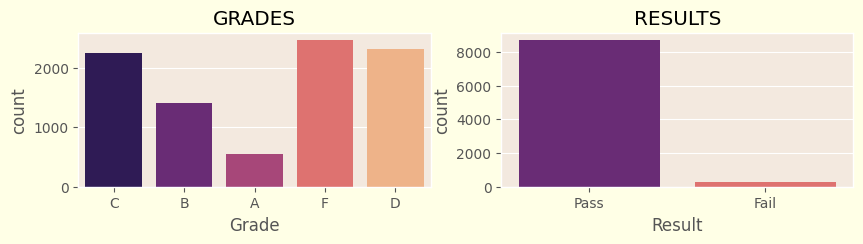

In [37]:
# see number of students in each grade category

plt.rcParams['figure.facecolor'] = "#ffffe6"

plt.figure(figsize=(10,2))

plt.subplot(1, 2, 1)
sns.countplot(x='Grade',data=df,palette='magma')
plt.title('GRADES')

plt.subplot(1, 2, 2)
sns.countplot(x='Result',data=df,palette='magma')
plt.title('RESULTS')
